In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'
output = 'netflix.csv'

gdown.download(url, output, quiet=False)

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100%|██████████| 3.40M/3.40M [00:00<00:00, 144MB/s]


'netflix.csv'

Problem Statement:

Given the dataset containing information about movies and TV shows available on Netflix, the objective is to analyze the data and generate insights to assist Netflix in making informed decisions regarding content production and business growth strategies in different countries.

# Load the dataset

In [3]:
df = pd.read_csv('netflix.csv')

# Understanding the data

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


*   From above representation of data seems like we need to treat cast and listed_in columns.
*   Also duration column also has some abnormality as in some rows we are seeing it in mins and seasons.

*   There are also many Null values present in the data so we also need to treat those.

In [5]:
df.shape

(8807, 12)

In [6]:
df.ndim

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

The dataset contains around 8807 rows out of 6131 rows belongs to movies and 2676 web-series.

In [9]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

We need to treat ratings as well as it seems there are some abnormal values.

# Let's start with data pre-processing or data cleaning operations.

In [10]:
constraint_listed_in = df['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
df_constraint_listed_in = pd.DataFrame(constraint_listed_in, index = df['title'])
df_constraint_listed_in = df_constraint_listed_in.stack()
df_constraint_listed_in = pd.DataFrame(df_constraint_listed_in.reset_index())
df_constraint_listed_in.rename(columns = {0 : 'Genre'},inplace = True)
df_constraint_listed_in = df_constraint_listed_in.drop('level_1',axis = 1)
df_constraint_listed_in

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [11]:
constraint_cast = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
df_constraint_cast = pd.DataFrame(constraint_cast, index = df['title'])
df_constraint_cast = df_constraint_cast.stack()
df_constraint_cast = pd.DataFrame(df_constraint_cast.reset_index())
df_constraint_cast.rename(columns = {0: "cast"}, inplace = True)
df_constraint_cast = df_constraint_cast.drop('level_1', axis = 1)
df_constraint_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [12]:
constraint_country = df['country'].apply(lambda x: str(x).split(', ')).to_list()
df_constraint_country = pd.DataFrame(constraint_country, index = df['title'])
df_constraint_country = df_constraint_country.stack()
df_constraint_country = pd.DataFrame(df_constraint_country.reset_index())
df_constraint_country.rename(columns = {0: "country"}, inplace = True)
df_constraint_country = df_constraint_country.drop('level_1', axis = 1)
df_constraint_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [13]:
constraint_director = df['director'].apply(lambda x: str(x).split(', ')).to_list()
df_constraint_director = pd.DataFrame(constraint_director, index = df['title'])
df_constraint_director = df_constraint_director.stack()
df_constraint_director = pd.DataFrame(df_constraint_director.reset_index())
df_constraint_director.rename(columns = {0: "director"}, inplace = True)
df_constraint_director = df_constraint_director.drop('level_1', axis = 1)
df_constraint_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [14]:
df_new = df_constraint_cast.merge(df_constraint_director, on = 'title', how = 'inner')
df_new = df_new.merge(df_constraint_listed_in,on = 'title', how = 'inner')
df_new = df_new.merge(df_constraint_country, on = 'title', how = 'inner')
df_new = df_new.merge(df[['title','rating']],on = 'title', how = 'inner')
df_new

,title,cast,director,Genre,country,rating
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,PG-13
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,TV-MA
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,TV-MA
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,TV-MA
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,TV-MA
...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,TV-14
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,TV-14
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,TV-14
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,TV-14


In [15]:
df_final = df_new.merge(df[['title','show_id','type','date_added','release_year','duration','description']],on='title', how='left')

In [16]:
df_final

,title,cast,director,Genre,country,rating,show_id,type,date_added,release_year,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,PG-13,s1,Movie,"September 25, 2021",2020,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...


The columns country, genre, and director seems to be treated. Let's try to see if they have any null values and treat accordingly.

In [17]:
df_final.isnull().sum()

title             0
cast              0
director          0
Genre             0
country           0
rating           67
show_id           0
type              0
date_added      158
release_year      0
duration          3
description       0
dtype: int64

The director column has null values but it is showing 0 in the above result because they might have been converted to string values let's convert them back to np.nan and then check no. of null values again.

In [18]:
df_final['director'] = df_final['director'].apply(lambda x: np.nan if x == 'nan' else x)
df_final['country'] = df_final['country'].apply(lambda x: np.nan if x == 'nan' else x)
df_final['Genre'] = df_final['Genre'].apply(lambda x: np.nan if x == 'nan' else x)
df_final['cast'] = df_final['cast'].apply(lambda x: np.nan if x == 'nan' else x)

In [19]:
df_final.isnull().sum()

title               0
cast             2146
director        50643
Genre               0
country         11897
rating             67
show_id             0
type                0
date_added        158
release_year        0
duration            3
description         0
dtype: int64

In [20]:
df_final['director'].fillna('Unknown Director',inplace = True)

In [21]:
df_final[df_final['type'] == 'TV Show'].isnull().sum()

title              0
cast             818
director           0
Genre              0
country         5698
rating            58
show_id            0
type               0
date_added       158
release_year       0
duration           0
description        0
dtype: int64

In [22]:
df_final[df_final['type'] == 'Movie'].isnull().sum()

title              0
cast            1328
director           0
Genre              0
country         6199
rating             9
show_id            0
type               0
date_added         0
release_year       0
duration           3
description        0
dtype: int64

From above two outputs we can infer that there is non null value for Tv show types so we only need to take care of Movie types.

In [23]:
movie_list = df_final[df_final['type'] == 'Movie']['duration'].apply(lambda x: str(x).split(' ')[0]).to_list()
typecasted = np.vectorize(lambda x: int(0) if x == 'nan' else int(x))
avg = int(typecasted(movie_list).mean())
df_final[df_final['duration'].isnull()]

,title,cast,director,Genre,country,rating,show_id,type,date_added,release_year,duration,description
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,74 min,s5542,Movie,"April 4, 2017",2017,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,84 min,s5795,Movie,"September 16, 2016",2010,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,66 min,s5814,Movie,"August 15, 2016",2015,NaN,The comic puts his trademark hilarious/thought...


In [24]:
df_final['duration'].fillna(f'{avg} min',inplace = True)

In [25]:
df_final['rating'].fillna('NR', inplace = True)

In [31]:
df_final['rating'] = df_final['rating'].apply(lambda x: 'NR' if 'min' in x else x)

In [32]:
df_final['rating'].value_counts()

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [33]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [44]:
for i in df_final[df_final['country'].isnull()]['director'].unique():
  if i in df_final[~df_final['country'].isnull()]['director'].unique():
    imp=df_final[df_final['director']==i]['country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imp)

In [50]:
for i in df_final[df_final['country'].isnull()]['cast'].unique():
  if i in df_final[~df_final['country'].isnull()]['cast'].unique():
    imp=df_final[df_final['cast']==i]['country'].mode().values[0]
    df_final.loc[df_final['cast']==i,'country']=df_final.loc[df_final['cast']==i,'country'].fillna(imp)

In [53]:
df_final['country'].fillna('Unknown Country',inplace=True)
df_final['cast'].fillna('Unknown Cast',inplace=True)
df_final.isnull().sum()

title           0
cast            0
director        0
Genre           0
country         0
rating          0
show_id         0
type            0
date_added      0
release_year    0
duration        0
description     0
dtype: int64

# Let's start with the visualization part to uncover some hidden trends inside data

In [76]:
df_final['duration_copy']=df_final['duration'].copy()
df_movie = df_final[df_final['type'] == 'Movie']
df_movie['duration_copy'] = df_movie['duration_copy'].apply(lambda x: int(str(x).split(' ')[0]))
df_movie['duration_copy'].astype(int)

<ipython-input-76-27711f7c164d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_copy'] = df_movie['duration_copy'].apply(lambda x: int(str(x).split(' ')[0]))


0          90
159        91
160        91
161        91
162        91
         ... 
201986    111
201987    111
201988    111
201989    111
201990    111
Name: duration_copy, Length: 145843, dtype: int64

In [77]:
bins = [-1,60,90,120,150,180,210,240,270,300,330]
labels = ['<60','60-90','90-120','120-150','150-180','180-210','210-240','240-270','270-300','300-330']
df_movie['duration_copy'] = pd.cut(df_movie['duration_copy'],bins=bins,labels=labels)
df_movie.head()

<ipython-input-77-3129129f0be1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_copy'] = pd.cut(df_movie['duration_copy'],bins=bins,labels=labels)


,title,cast,director,Genre,country,rating,show_id,type,date_added,release_year,duration,description,duration_copy
0,Dick Johnson Is Dead,Unknown Cast,Kirsten Johnson,Documentaries,United States,PG-13,s1,Movie,"September 25, 2021",2020,90 min,"As her father nears the end of his life, filmm...",60-90
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,United States,PG,s7,Movie,"September 24, 2021",2021,91 min,Equestria's divided. But a bright-eyed hero be...,90-120
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,United States,PG,s7,Movie,"September 24, 2021",2021,91 min,Equestria's divided. But a bright-eyed hero be...,90-120
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,United States,PG,s7,Movie,"September 24, 2021",2021,91 min,Equestria's divided. But a bright-eyed hero be...,90-120
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,United States,PG,s7,Movie,"September 24, 2021",2021,91 min,Equestria's divided. But a bright-eyed hero be...,90-120


In [80]:
df_movie['duration_copy'].value_counts()

90-120     81633
120-150    26691
60-90      26526
150-180     5871
<60         3732
180-210     1127
210-240      220
240-270       21
300-330       15
270-300        7
Name: duration_copy, dtype: int64

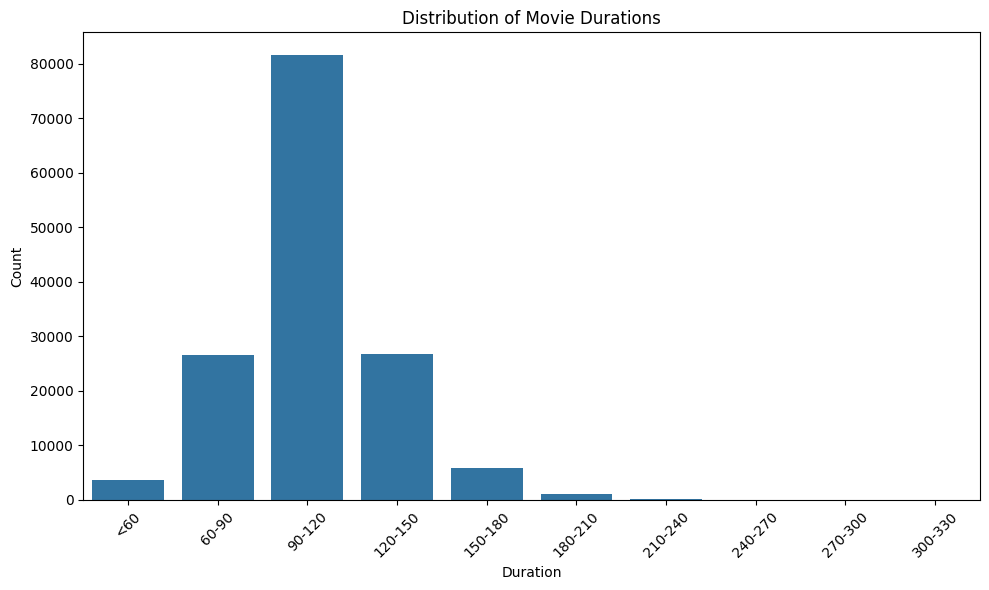

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_movie, x='duration_copy')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Most movies produced are of duration 90-120 which are more than rest.

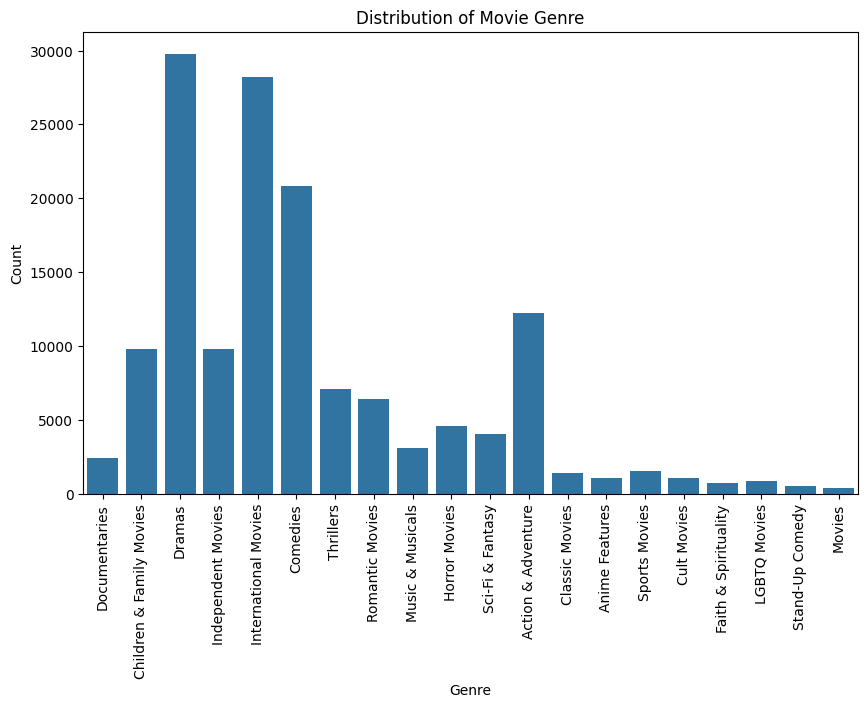

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_movie, x='Genre')
plt.title('Distribution of Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Most movies are produced in Dramas,International Movies,Comedies

In [131]:
df_web = df_final[df_final['type'] == 'TV Show']
df_web['duration_copy'] = df_web['duration_copy'].apply(lambda x: int(str(x).split(' ')[0]))
df_web['duration_copy'].astype(int)
df_web

<ipython-input-131-0f9e65e8ddac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web['duration_copy'] = df_web['duration_copy'].apply(lambda x: int(str(x).split(' ')[0]))


,title,cast,director,Genre,country,rating,show_id,type,date_added,release_year,duration,description,duration_copy,Modified_Added_date,month_added,week_Added,year_added
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201864,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknown Director,Romantic TV Shows,Pakistan,TV-PG,s8801,TV Show,"December 15, 2016",2012,1 Season,"Strong-willed, middle-class Kashaf and carefre...",1,2016-12-15,12,50,2016
201865,Zindagi Gulzar Hai,Hina Khawaja Bayat,Unknown Director,TV Dramas,Pakistan,TV-PG,s8801,TV Show,"December 15, 2016",2012,1 Season,"Strong-willed, middle-class Kashaf and carefre...",1,2016-12-15,12,50,2016
201932,Zombie Dumb,Unknown Cast,Unknown Director,Kids' TV,United States,TV-Y7,s8804,TV Show,"July 1, 2019",2018,2 Seasons,"While living alone in a spooky town, a young g...",2,2019-07-01,7,27,2019
201933,Zombie Dumb,Unknown Cast,Unknown Director,Korean TV Shows,United States,TV-Y7,s8804,TV Show,"July 1, 2019",2018,2 Seasons,"While living alone in a spooky town, a young g...",2,2019-07-01,7,27,2019


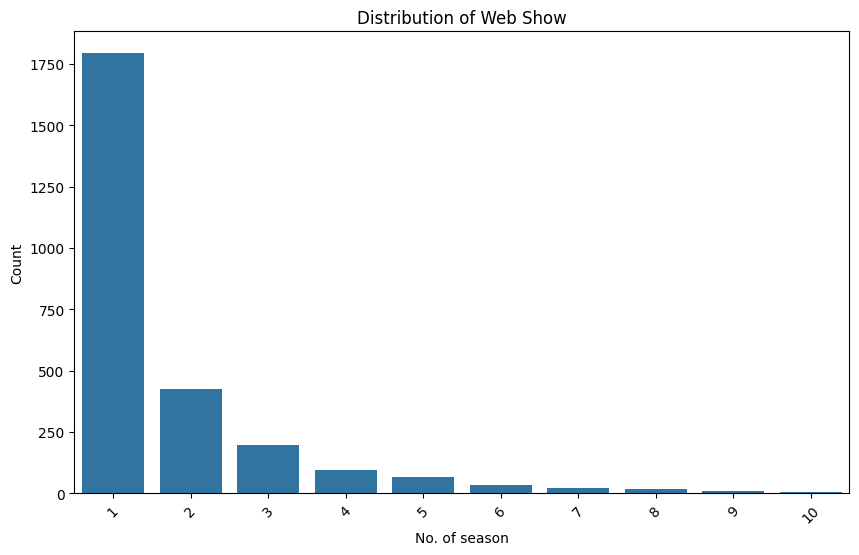

In [132]:
df_web_show = df_web[['title','country','duration_copy','Genre']].groupby(by=['duration_copy']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
# df_country=df_final.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_web_show
plt.figure(figsize=(10, 6))
sns.barplot(data=df_web_show, x='duration_copy',y='title')
plt.title('Distribution of Web Show')
plt.xlabel('No. of season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Most TV Shows produced are generally one season.

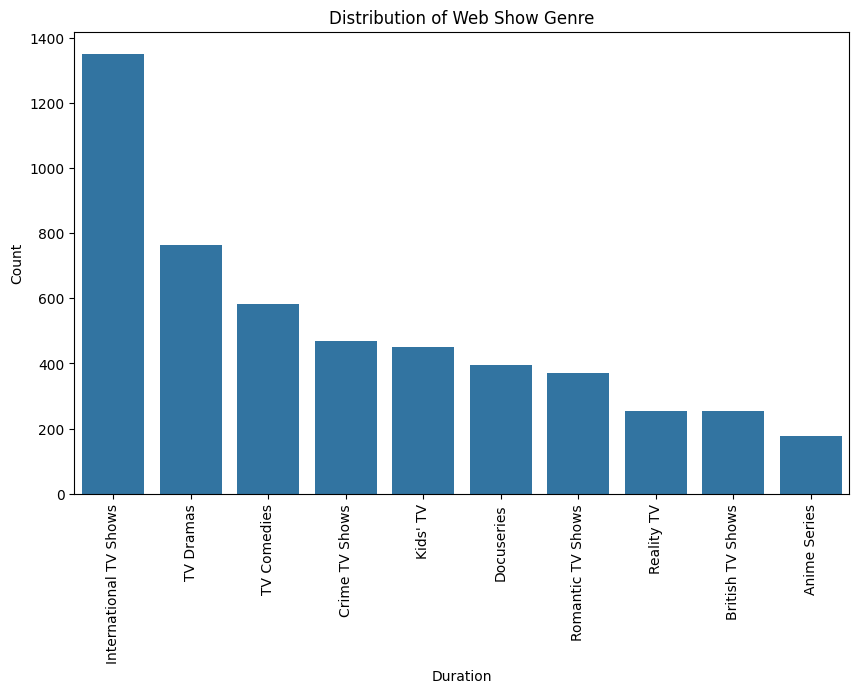

In [136]:
df_web_show = df_web.groupby(by=['Genre']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_web_show, x = 'Genre', y='title')
plt.title('Distribution of Web Show Genre')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

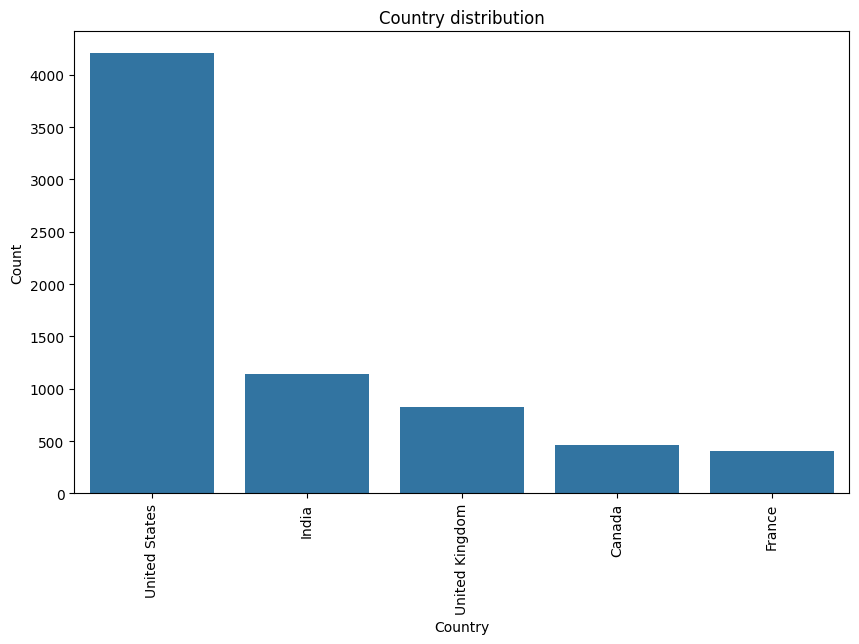

In [137]:
df_country=df_final.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_country, x='country',y='title')
plt.title('Country distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Top 5 country which produces most movies and TV shows.

Let's keep our focus these top countries for further analysis.

In [98]:
from dateutil.parser import parse
df_final['Modified_Added_date'] = df_final['date_added'].apply(lambda x: parse(x).strftime('%Y-%m-%d'))
df_final['Modified_Added_date'] = pd.to_datetime(df_final['Modified_Added_date'])

In [100]:
df_final['month_added']=df_final['Modified_Added_date'].dt.month
df_final['week_Added']=df_final['Modified_Added_date'].dt.week
df_final['year_added']=df_final['Modified_Added_date'].dt.year

<ipython-input-100-3d1b5119ae76>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final['week_Added']=df_final['Modified_Added_date'].dt.week


In [101]:
df_final

,title,cast,director,Genre,country,rating,show_id,type,date_added,release_year,duration,description,duration_copy,Modified_Added_date,month_added,week_Added,year_added
0,Dick Johnson Is Dead,Unknown Cast,Kirsten Johnson,Documentaries,United States,PG-13,s1,Movie,"September 25, 2021",2020,90 min,"As her father nears the end of his life, filmm...",90 min,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,TV-MA,s2,TV Show,"September 24, 2021",2021,2 Seasons,"After crossing paths at a party, a Cape Town t...",2 Seasons,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...,111 min,2019-03-02,3,9,2019
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...,111 min,2019-03-02,3,9,2019
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...,111 min,2019-03-02,3,9,2019
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,TV-14,s8807,Movie,"March 2, 2019",2015,111 min,A scrappy but poor boy worms his way into a ty...,111 min,2019-03-02,3,9,2019


In [139]:
df_us = df_final[df_final['country'] == 'United States']
df_fr = df_final[df_final['country'] == 'France']
df_ind = df_final[df_final['country'] == 'India']
df_uk = df_final[df_final['country'] == 'United Kingdom']
df_ca = df_final[df_final['country'] == 'Canada']


# US

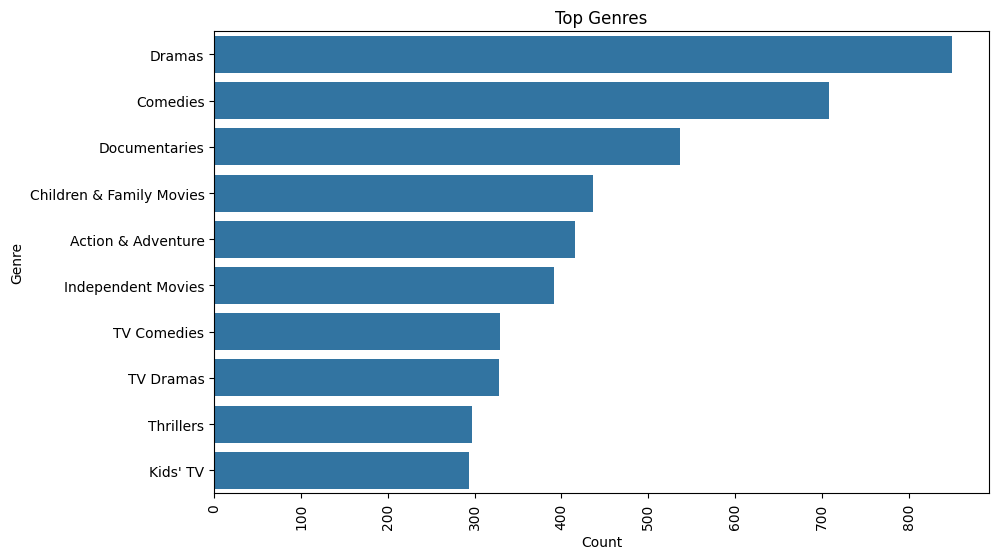

In [149]:
df_us_genre = df_us.groupby(by=['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_us_genre, x='title', y='Genre')
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation = 90)
plt.show()

In US Dramas, Comedies, and Documentaries are very popular genre.

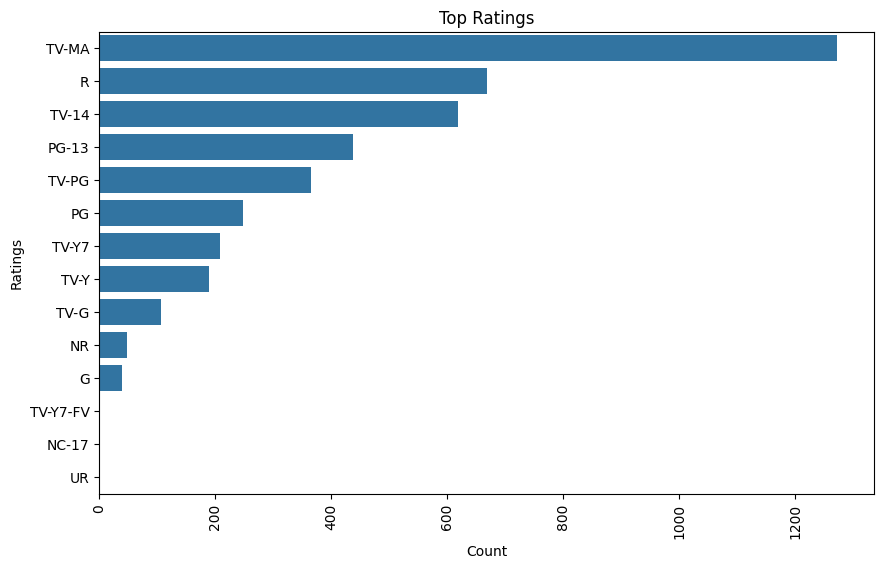

In [150]:
df_us_rating = df_us.groupby(by=['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_us_rating, x='title', y='rating')
plt.title('Top Ratings')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.xticks(rotation = 90)
plt.show()

In US TV-MA, R, TV-14 are top ratings in which most of the movies are produced.

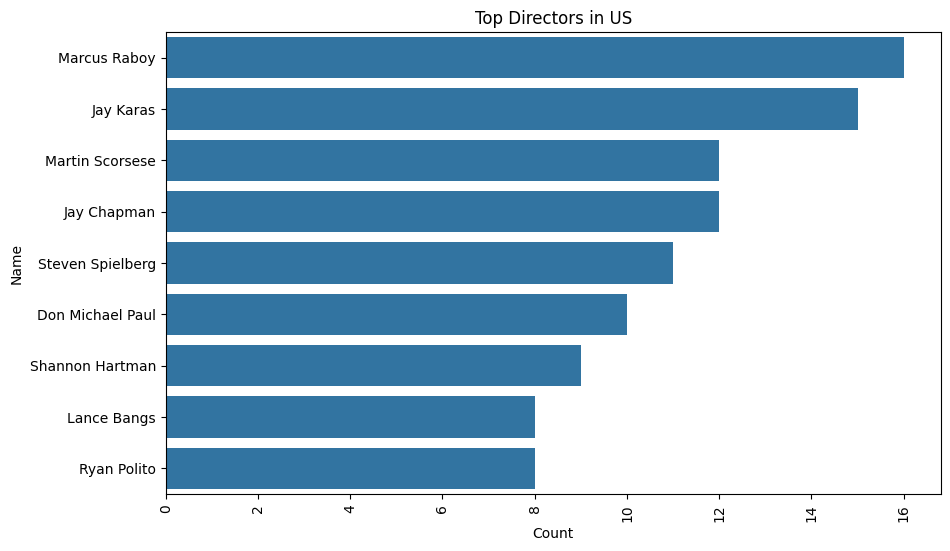

In [158]:
df_us_gen_dir = df_us.groupby(by=['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
df_us_gen_dir = df_us_gen_dir[df_us_gen_dir['director'] != 'Unknown Director']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_us_gen_dir, x='title', y='director')
plt.title('Top Directors in US')
plt.xlabel('Count')
plt.ylabel('Name')
plt.xticks(rotation = 90)
plt.show()

Marcus Raboy, jay Karas, Martin Scorsese are three most popular directors in US.

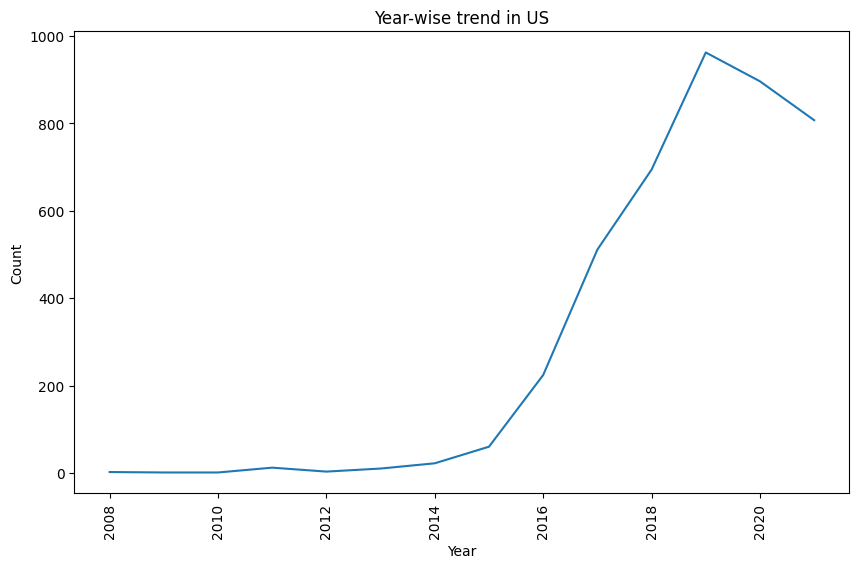

In [163]:
df_us_year_added = df_us.groupby(by=['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_us_year_added, y='title', x='year_added')
plt.title('Year-wise trend in US')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

The no. of movies added in US has tremendously increased after Year 2015.

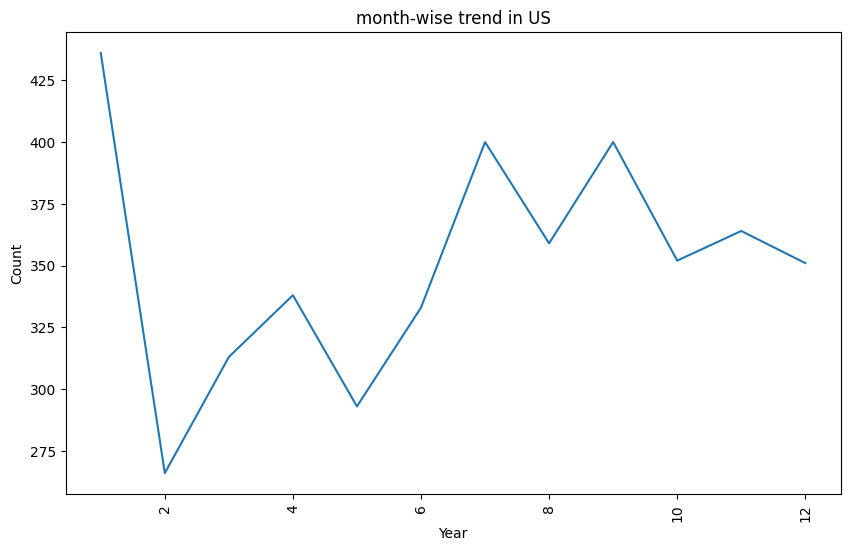

In [165]:
df_us_month_added = df_us.groupby(by=['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_us_month_added, y='title', x='month_added')
plt.title('month-wise trend in US')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

In US most movies are added in 1st month and mid of year.

# India

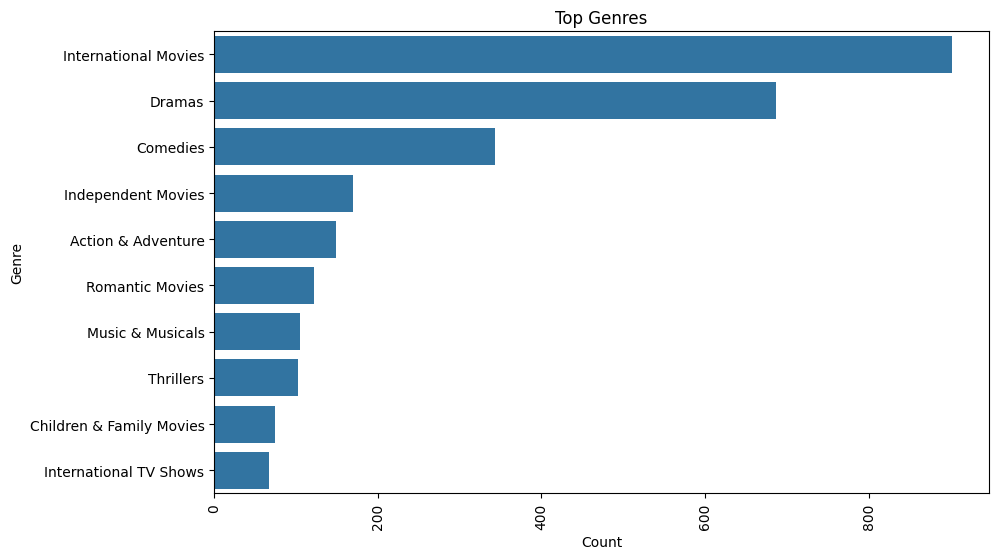

In [166]:
df_ind_genre = df_ind.groupby(by=['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ind_genre, x='title', y='Genre')
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation = 90)
plt.show()

Most Popular genre in India are
*   Dramas
*   International Movies
*   Comedies





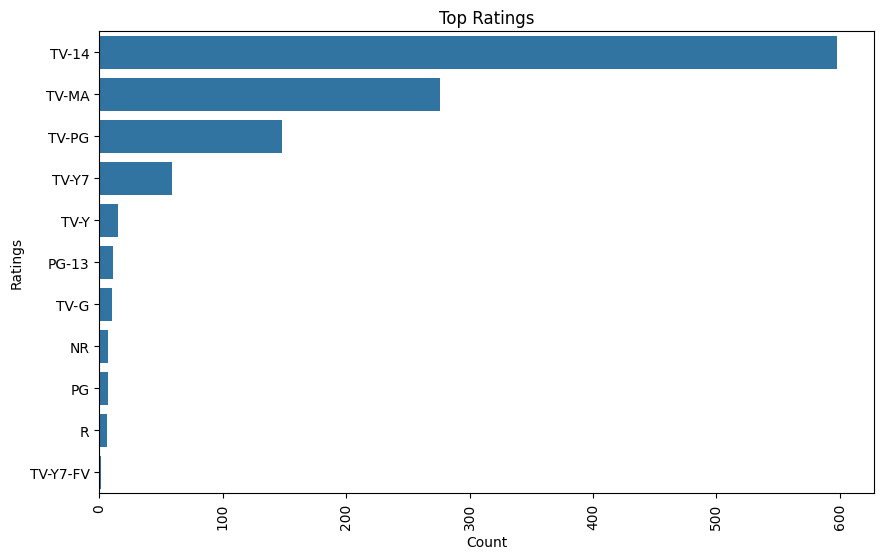

In [167]:
df_ind_rating = df_ind.groupby(by=['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ind_rating, x='title', y='rating')
plt.title('Top Ratings')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.xticks(rotation = 90)
plt.show()

Most porpular rating in India is TV-14.

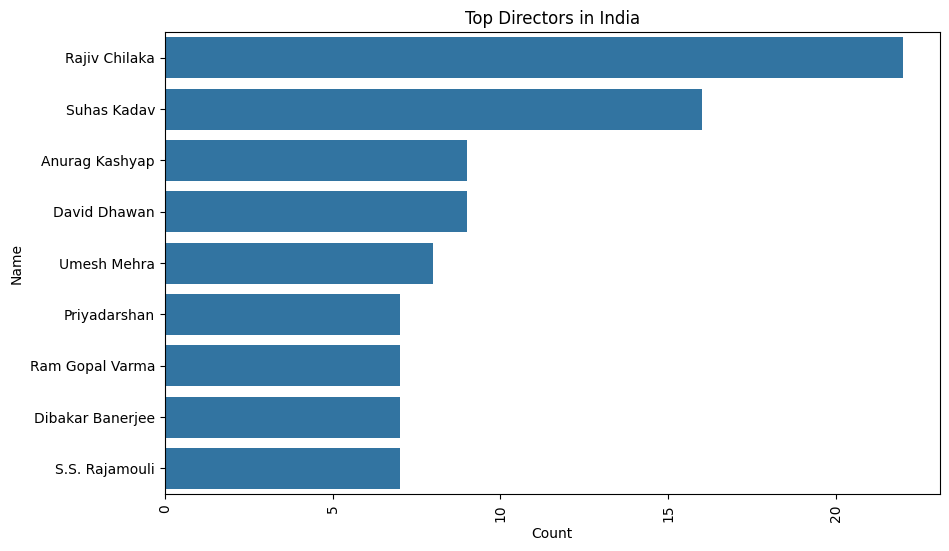

In [170]:
df_ind_dir = df_ind.groupby(by=['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
df_ind_dir = df_ind_dir[df_ind_dir['director'] != 'Unknown Director']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ind_dir, x='title', y='director')
plt.title('Top Directors in India')
plt.xlabel('Count')
plt.ylabel('Name')
plt.xticks(rotation = 90)
plt.show()

Rajiv chilaka, Suhas Yadav, Anurag Kashyap, David dhawan are popular directors in India.

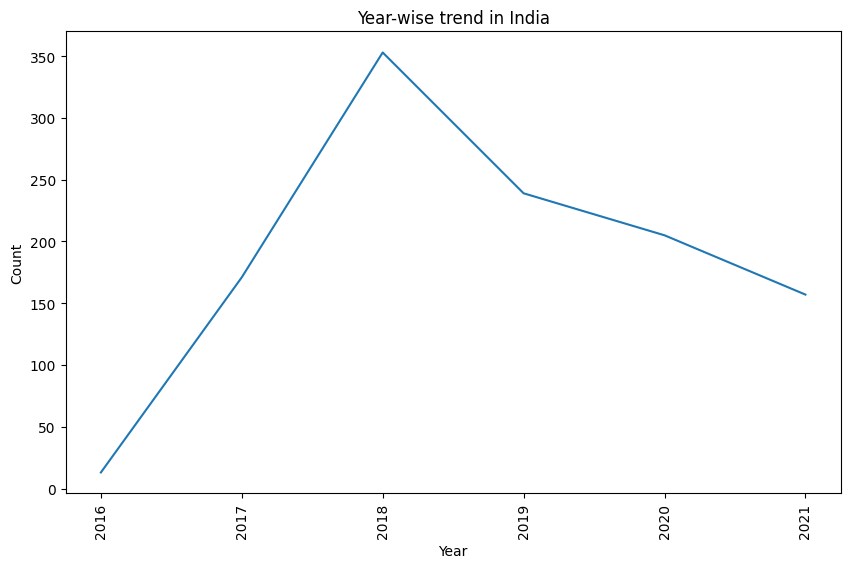

In [171]:
df_ind_year_added = df_ind.groupby(by=['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ind_year_added, y='title', x='year_added')
plt.title('Year-wise trend in India')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

No. of movies added has declined in India after Year 2021.

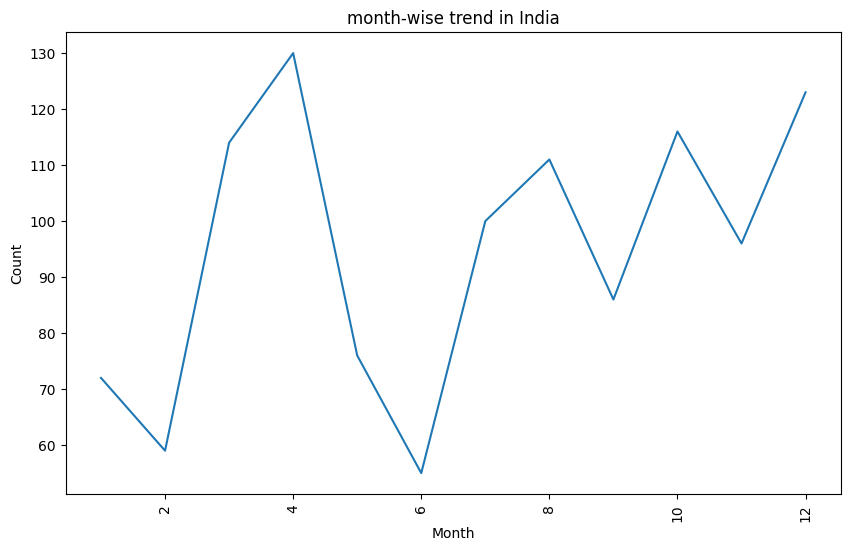

In [172]:
df_ind_month_added = df_ind.groupby(by=['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ind_month_added, y='title', x='month_added')
plt.title('month-wise trend in India')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

During the festive month's most of movies are added.
As generally movies are added in march-april,August,October and December.

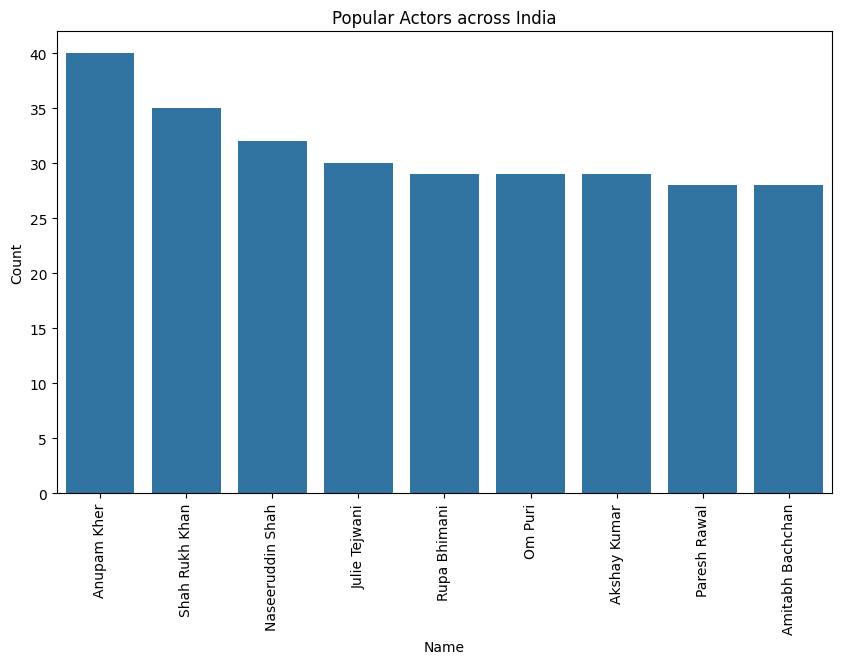

In [176]:
df_ind_cast = df_ind.groupby(by=['cast']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
df_ind_cast = df_ind_cast[df_ind_cast['cast'] != 'Unknown Cast']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ind_cast, y='title', x='cast')
plt.title('Popular Actors across India')
plt.ylabel('Count')
plt.xlabel('Name')
plt.xticks(rotation = 90)
plt.show()

Anupam Kher, Shahrukh Khan, Naseeruddin Shah are popular actors across India which belongs to most of the movies.

# UK

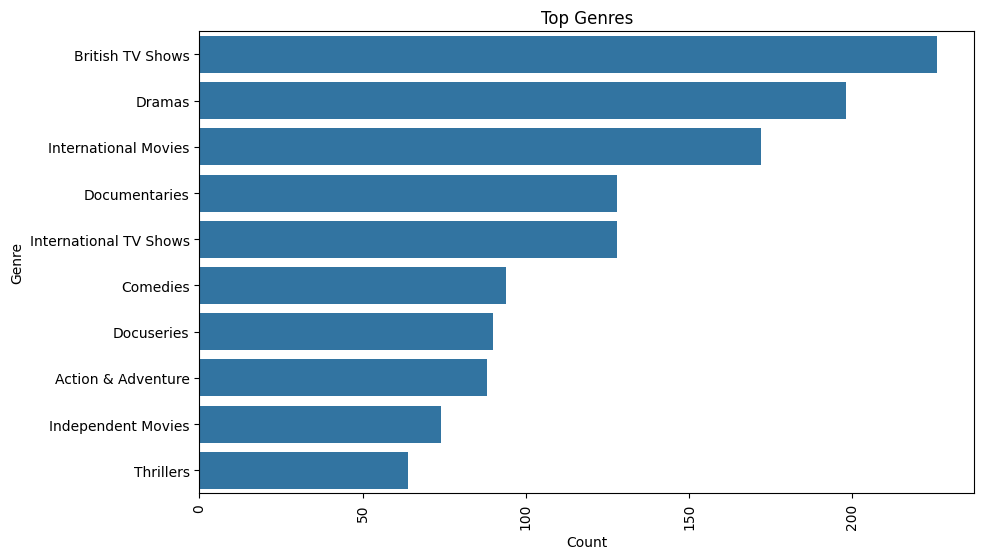

In [177]:
df_uk_genre = df_uk.groupby(by=['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_uk_genre, x='title', y='Genre')
plt.title('Top Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation = 90)
plt.show()

British Tv shows, Dramas are very popular in UK.

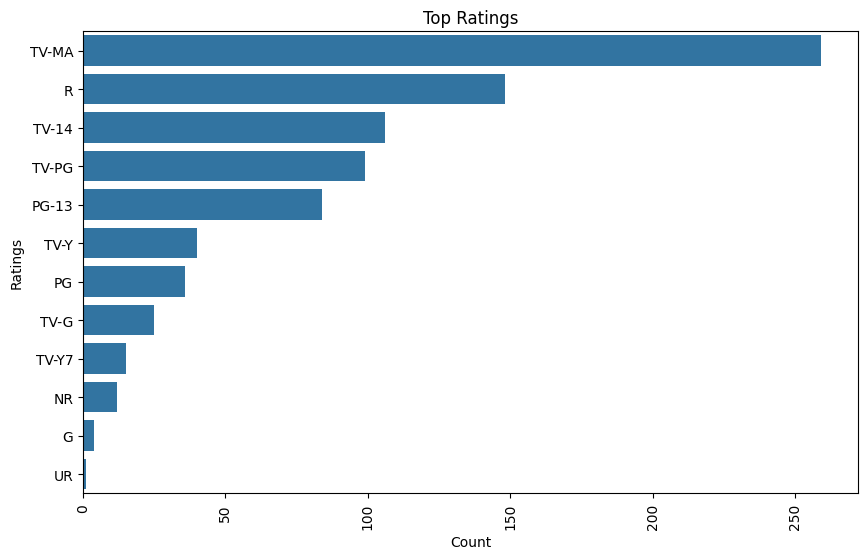

In [178]:
df_uk_rating = df_uk.groupby(by=['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_uk_rating, x='title', y='rating')
plt.title('Top Ratings')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.xticks(rotation = 90)
plt.show()

TV-MA, R, TV-14 are very popular ratings across UK.

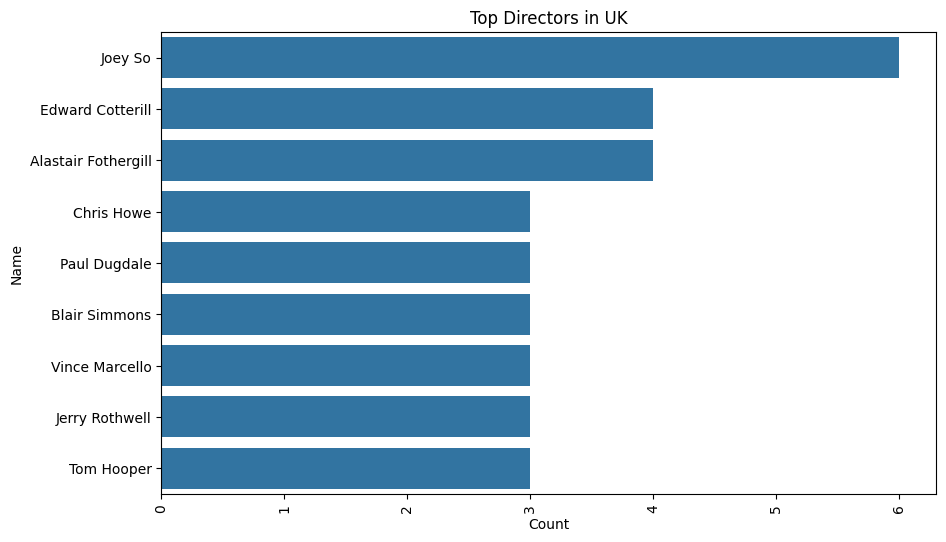

In [180]:
df_uk_dir = df_uk.groupby(by=['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)[:10]
df_uk_dir = df_uk_dir[df_uk_dir['director'] != 'Unknown Director']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_uk_dir, x='title', y='director')
plt.title('Top Directors in UK')
plt.xlabel('Count')
plt.ylabel('Name')
plt.xticks(rotation = 90)
plt.show()

Joey So is the most popular director in UK.

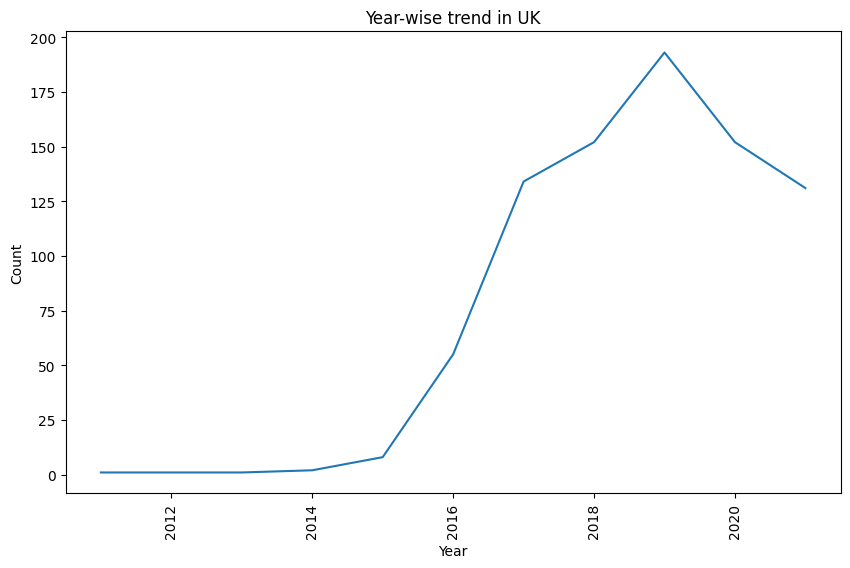

In [181]:
df_uk_year_added = df_uk.groupby(by=['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_uk_year_added, y='title', x='year_added')
plt.title('Year-wise trend in UK')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

No. of movies added increased drastically after year 2016 but started declining after year 2019.

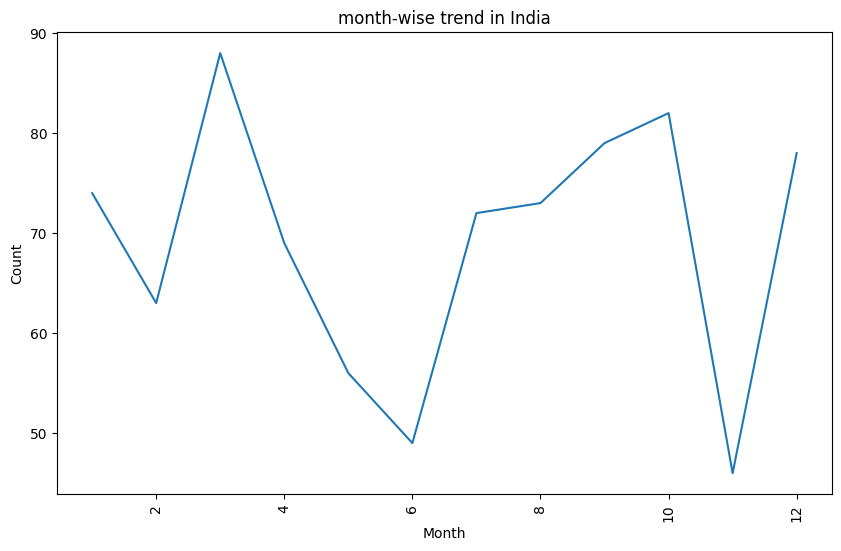

In [182]:
df_uk_month_added = df_uk.groupby(by=['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'], ascending = False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_uk_month_added, y='title', x='month_added')
plt.title('month-wise trend in India')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

No. of movies added are on Peak in starting of year and ending of Year also goes down mid year.

# Popular Actors across each genre

In [186]:
df_final[df_final['cast'] != 'Unknown Cast'].groupby(['Genre']).agg({'cast': lambda x: x.mode().iloc[0]})

,cast
Genre,
Action & Adventure,Luci Christian
Anime Features,Andy McAvin
Anime Series,Takahiro Sakurai
British TV Shows,David Attenborough
Children & Family Movies,John Krasinski
Classic & Cult TV,Don S. Davis
Classic Movies,Burgess Meredith
Comedies,Tara Strong
Crime TV Shows,Raúl Méndez


# Popular Directors across each genre

In [188]:
df_final[df_final['director'] != 'Unknown Director'].groupby(['Genre']).agg({'director': lambda x: x.mode().iloc[0]})

,director
Genre,
Action & Adventure,Martin Campbell
Anime Features,Toshiya Shinohara
Anime Series,Jay Oliva
British TV Shows,Noam Murro
Children & Family Movies,Raja Gosnell
Classic & Cult TV,Phil Sgriccia
Classic Movies,Youssef Chahine
Comedies,Raja Gosnell
Crime TV Shows,Alejandro Lozano


# Top Actors Year-wise

In [189]:
df_final[df_final['cast'] != 'Unknown Cast'].groupby(['year_added']).agg({'cast': lambda x: x.mode().iloc[0]})

,cast
year_added,
2008,Barbara King
2009,Anders W. Berthelsen
2010,Anthony Kelly
2011,Judith Light
2012,Adrian Martinez
2013,Billy Campbell
2014,Andrea Libman
2015,David Attenborough
2016,David Attenborough


# Top Directors Year wise

In [191]:
df_final[df_final['director'] != 'Unknown Director'].groupby(['year_added']).agg({'director': lambda x: x.mode().iloc[0]})

,director
year_added,
2008,Sorin Dan Mihalcescu
2009,Ole Bornedal
2010,Jim Monaco
2011,Rob LaDuca
2012,Tim Johnson
2013,Jason Moore
2014,Jehane Noujaim
2015,Eli Roth
2016,Wilson Yip


##Recommendations
1. **Focus on Popular Genres**:
   - Concentrate on genres like Drama, Comedy, and International productions, as they have shown widespread popularity across different countries and in both TV Shows and Movies.

2. **Strategic Release Timing**:
   - Schedule the release of TV Shows and Movies during July, August, and the last week of the year or the first month of the following year to capitalize on peak viewership periods.

3. **Optimal Length for Movies**:
   - For movies, aim for a duration of 90-120 minutes, as this length is found to be optimal for viewer engagement. Additionally, consider producing TV Shows alongside these genres for added appeal.

4. **Target Audience Ratings**:
   - Tailor content for different regions:
     - For the USA and India, target audiences aged 14 and above.
     - For the UK, focus on Mature/R-rated content exclusively.

5. **Regional Content Preferences**:
   - Create content specifically tailored for Indian and UK audiences, particularly movies, as there has been a decline in interest since 2018.

6. **Leverage Popular Personalities**:
   - Take advantage of the popularity of well-known actors and directors within each country. Pay attention to successful director-actor combinations, as they can significantly enhance the appeal of the content.